In [313]:
#importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import pickle
%matplotlib inline 


In [314]:
#import the dataset and extract the dependant and independant 

data = pd.read_csv('kidney_disease.csv')
data.head()
#data.shape

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


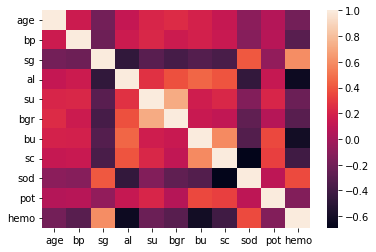

In [315]:
#reprasantation with correration matrix
#corr = df.corr()
#sns.heatmap(data,xticklabels = corr.columns,yticklabels = corr.columns )
data.drop(["id"],axis=1,inplace=True)
sns.heatmap(data.corr())

In [316]:
categorial_cols = [col for col in data.columns if data[col].dtype=="object"]
categorial_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [317]:
numerical_cols = [x for x in data.columns if not x in categorial_cols]
numerical_cols

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [318]:
#Extracting float values from string in a column
#for further use in strings concstinate 
for i in ['rc','wc','pcv']:
    data[i] = data[i].str.extract('(\d+)').astype(float)

In [319]:
#filling the null values with the mean values 
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    data[i].fillna(data[i].mean(),inplace=True)

In [320]:
#if still null values present then replacing the null value with the most frequent value in the column
data=data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [321]:
#converting the categorial data by using oneHot Encoding
cate = pd.get_dummies(data[["rbc","rbc","pc","pcc","ba"]],drop_first=True)
cate.head()

,rbc_normal,rbc_normal,pc_normal,pcc_present,ba_present
0,1,1,1,0,0
1,1,1,1,0,0
2,1,1,1,0,0
3,1,1,0,1,0
4,1,1,1,0,0


In [322]:
#dropping the categorial data columns
data.drop(["rbc","pc","pcc","ba"],axis=1,inplace=True)

In [323]:
#concating the data columns
data = pd.concat([data,cate],axis=1)
data.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,cad,appet,pe,ane,classification,rbc_normal,rbc_normal,pc_normal,pcc_present,ba_present
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,...,no,good,no,no,ckd,1,1,1,0,0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,...,no,good,no,no,ckd,1,1,1,0,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,...,no,poor,no,yes,ckd,1,1,1,0,0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,no,poor,yes,yes,ckd,1,1,0,1,0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,...,no,good,no,no,ckd,1,1,1,0,0


In [324]:
#converting the age Data column into list
#k=data["age"].apply(lambda x : int(x)//10).to_list()

In [325]:
#batching the ages(0-9,10-19,20-29,......90-99)
#a=[0]*10
#for i in range(len(k)):
   # a[k[i]]+=1
#a

In [326]:
'''plt.figure(figsize= (7,7))
x_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
y_labels = np.array(a)
plt.pie(y_labels, labels = x_labels)
plt.show() '''

"plt.figure(figsize= (7,7))\nx_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']\ny_labels = np.array(a)\nplt.pie(y_labels, labels = x_labels)\nplt.show() "

In [327]:
data["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [328]:
#replacing the values of notckd, ckd and ckd/t in the dataset
data.replace({"notckd":0,"ckd":1,"ckd\t":1},inplace=True)

In [329]:
data.replace({"good":1,"poor":0},inplace=True)
#replacing the values of no, yes to 0,1 respectively
data.replace({"no":0,"yes":1,"\tno":0,"\tyes":1," yes":1},inplace=True)
data

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,cad,appet,pe,ane,classification,rbc_normal,rbc_normal,pc_normal,pcc_present,ba_present
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,...,0,1,0,0,1,1,1,1,0,0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,...,0,1,0,0,1,1,1,1,0,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,...,0,0,0,1,1,1,1,1,0,0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,0,0,1,1,1,1,1,0,1,0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,...,0,1,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,...,0,1,0,0,0,1,1,1,0,0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,...,0,1,0,0,0,1,1,1,0,0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,...,0,1,0,0,0,1,1,1,0,0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,...,0,1,0,0,0,1,1,1,0,0


Splitting Train Data and Test Data

In [330]:
#seperating the data for the model as X contains the data which feed to the model and y contains the target column 
X = data.loc[:,['age', 'bp', 'rc','wc','appet','pc_normal','htn','hemo','bgr','dm','ane']]
y = data["classification"]

In [331]:
#splitting the train data and test Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
X_train.head()

,age,bp,rc,wc,appet,pc_normal,htn,hemo,bgr,dm,ane
336,25.0,60.0,5.000000,9200.000000,1,1,0,15.2,119.000000,0,0
64,55.0,80.0,4.241636,8406.122449,1,1,0,9.8,146.000000,0,0
55,35.0,80.0,4.241636,8406.122449,1,1,0,9.5,148.036517,0,0
106,50.0,90.0,4.241636,6500.000000,1,1,1,6.0,89.000000,1,1
300,45.0,60.0,5.000000,9200.000000,1,1,0,15.0,114.000000,0,0


the model

In [332]:
#using the random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [333]:
predicts =model.predict(X_test)
#printing the accuracy of the train data
print("the accuracy of the train data is ",model.score(X_train,y_train)*100)

the accuracy of the train data is  100.0


In [334]:
#printing the accuracy of the test data
print("the accuracy of the test data is",model.score(X_test,y_test)*100)

the accuracy of the test data is 97.5


In [335]:
'''#using the XGradient Boosting algorithm
from xgboost import XGBClassifier
mod = XGBClassifier()
mod.fit(X_train,y_train)'''

'#using the XGradient Boosting algorithm\nfrom xgboost import XGBClassifier\nmod = XGBClassifier()\nmod.fit(X_train,y_train)'